# Jamboore Education

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

## Column Profiling:

* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


sns.set(rc={"figure.dpi":150})
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv('jamboree_admission.csv')

In [3]:
data.shape

(500, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
data = data.drop(columns='Serial No.')
data.columns = [col.strip().replace(' ', '_').lower() for col in data.columns]
data

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
data.describe()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
data.nunique(dropna=False)

gre_score             49
toefl_score           29
university_rating      5
sop                    9
lor                    9
cgpa                 184
research               2
chance_of_admit       61
dtype: int64

In [8]:
df = data.astype({ 
             'university_rating':'category', 
             'sop':'category', 
             'lor':'category', 
             'research':'category'
            })

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gre_score          500 non-null    int64   
 1   toefl_score        500 non-null    int64   
 2   university_rating  500 non-null    category
 3   sop                500 non-null    category
 4   lor                500 non-null    category
 5   cgpa               500 non-null    float64 
 6   research           500 non-null    category
 7   chance_of_admit    500 non-null    float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 18.8 KB


In [10]:
category_cols = df.select_dtypes('category')
for column in category_cols:
    print(column+' % Proportion:')
    display(
        round((df[column].value_counts() / df[column].value_counts().sum()) *100, 2)
    )
    print('-'*50)

university_rating % Proportion:


university_rating
3    32.4
2    25.2
4    21.0
5    14.6
1     6.8
Name: count, dtype: float64

--------------------------------------------------
sop % Proportion:


sop
4.0    17.8
3.5    17.6
3.0    16.0
2.5    12.8
4.5    12.6
2.0     8.6
5.0     8.4
1.5     5.0
1.0     1.2
Name: count, dtype: float64

--------------------------------------------------
lor % Proportion:


lor
3.0    19.8
4.0    18.8
3.5    17.2
4.5    12.6
2.5    10.0
5.0    10.0
2.0     9.2
1.5     2.2
1.0     0.2
Name: count, dtype: float64

--------------------------------------------------
research % Proportion:


research
1    56.0
0    44.0
Name: count, dtype: float64

--------------------------------------------------


---

## Univariate Analysis

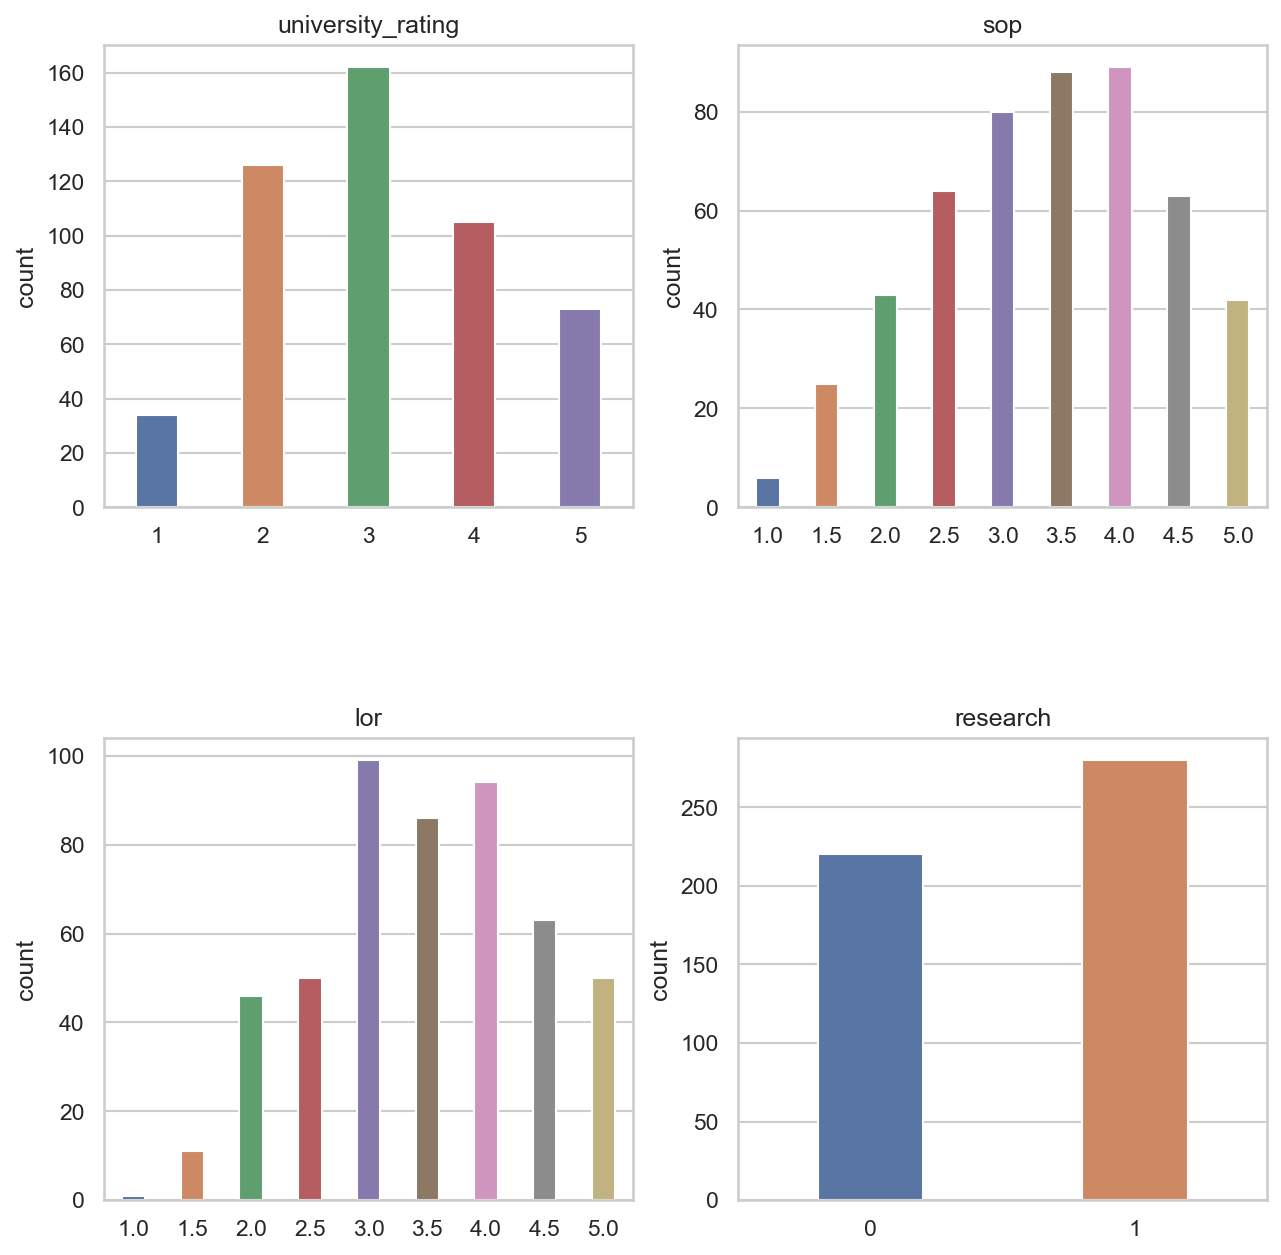

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
plt.subplots_adjust(hspace=0.5)

for column, ax in zip(category_cols, axs.ravel()[:]):
    sns.countplot(x=df[column],width=0.4, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')

plt.show()

In [12]:
non_cat_cols = df.select_dtypes(exclude='category')

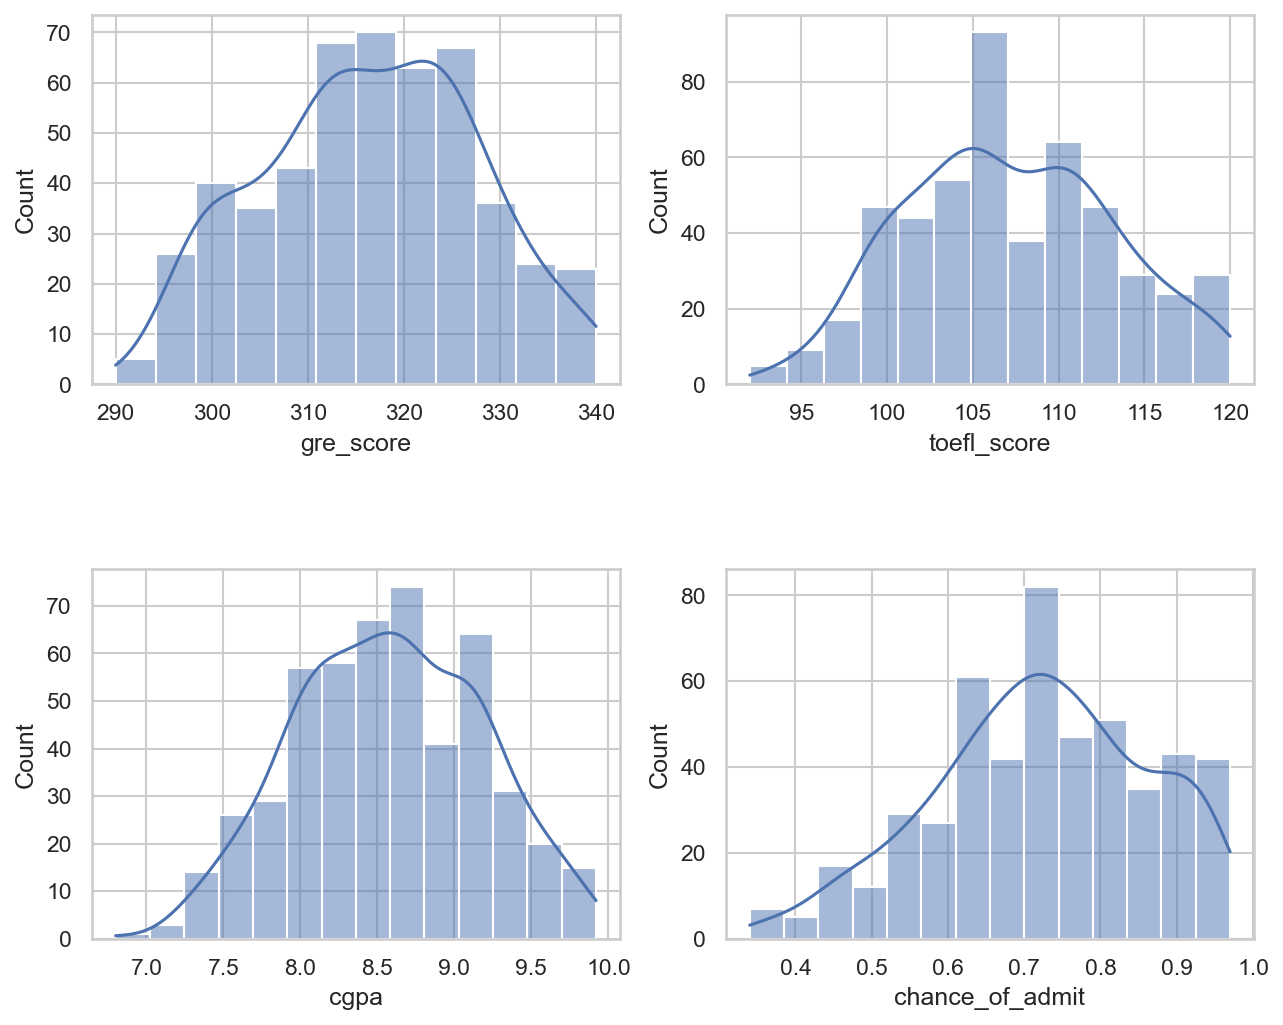

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
plt.subplots_adjust(hspace=0.5)

for col, ax in zip(non_cat_cols, axs.ravel()):
    sns.histplot(x = data[col], ax=ax, kde=True)
plt.show()

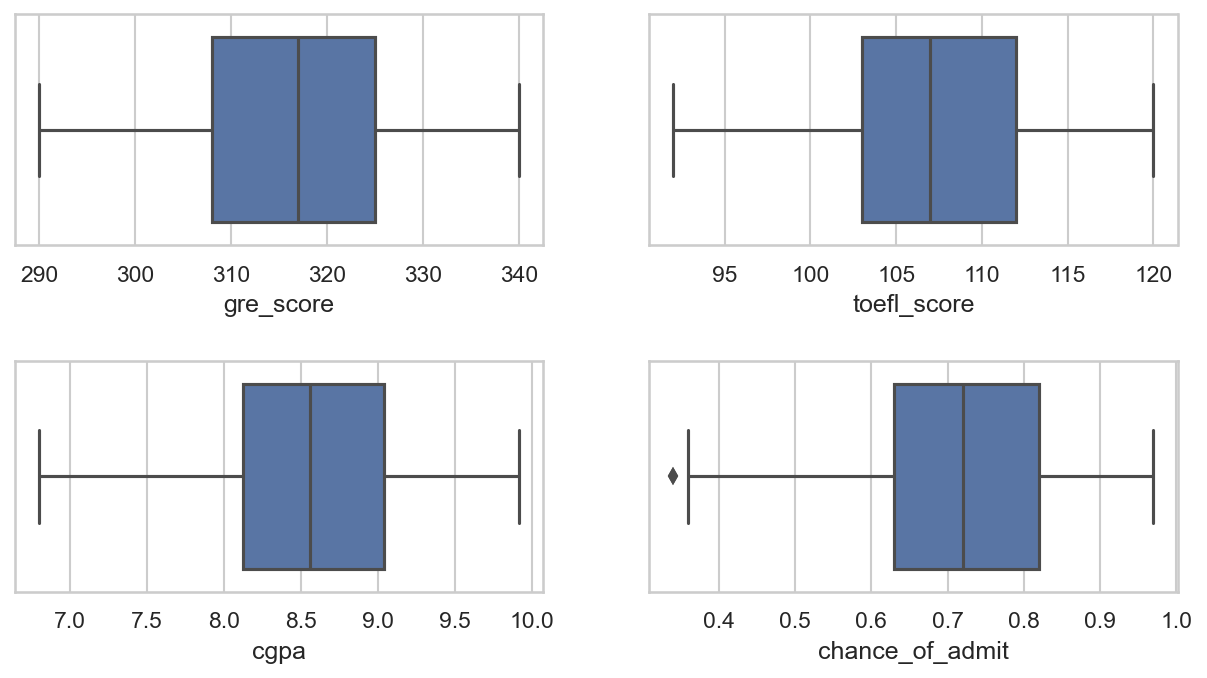

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
plt.subplots_adjust(hspace=0.5)

for col, ax in zip(non_cat_cols, axs.ravel()):
    sns.boxplot(x = data[col], ax=ax)
plt.show()

In [15]:
df = df.assign(admitted= lambda x: x.chance_of_admit > 0.75 )
df.admitted = df.admitted.apply(lambda x: 1 if x else 0)
df = df.astype({'admitted':'category'})
df

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,1
496,337,117,5,5.0,5.0,9.87,1,0.96,1
497,330,120,5,4.5,5.0,9.56,1,0.93,1
498,312,103,4,4.0,5.0,8.43,0,0.73,0


In [16]:
pd.crosstab(index=[df.sop, ],
            columns=[df.admitted, ],
            margins=True, 
            normalize=True
            )\
                .style.background_gradient(cmap='YlGnBu')\
                    .format('{:.2%}')

admitted,0,1,All
sop,,,
1.000000,1.20%,0.00%,1.20%
1.500000,4.80%,0.20%,5.00%
2.000000,8.20%,0.40%,8.60%
2.500000,11.80%,1.00%,12.80%
3.000000,12.40%,3.60%,16.00%
3.500000,11.20%,6.40%,17.60%
4.000000,6.20%,11.60%,17.80%
4.500000,1.60%,11.00%,12.60%
5.000000,0.60%,7.80%,8.40%


In [17]:
pd.crosstab(index=[df.lor, ],
            columns=[df.admitted, ],
            margins=True, 
            normalize=True
            )\
                .style.background_gradient(cmap='YlGnBu')\
                    .format('{:.2%}')

admitted,0,1,All
lor,,,
1.000000,0.20%,0.00%,0.20%
1.500000,2.00%,0.20%,2.20%
2.000000,8.80%,0.40%,9.20%
2.500000,9.00%,1.00%,10.00%
3.000000,15.20%,4.60%,19.80%
3.500000,11.00%,6.20%,17.20%
4.000000,8.00%,10.80%,18.80%
4.500000,2.60%,10.00%,12.60%
5.000000,1.20%,8.80%,10.00%


In [18]:
pd.crosstab(index=[df.university_rating, ],
            columns=[df.admitted, ],
            margins=True, 
            normalize=True
            )\
                .style.background_gradient(cmap='YlGnBu')\
                    .format('{:.2%}')

admitted,0,1,All
university_rating,,,
1,6.40%,0.40%,6.80%
2,23.20%,2.00%,25.20%
3,22.20%,10.20%,32.40%
4,5.20%,15.80%,21.00%
5,1.00%,13.60%,14.60%
All,58.00%,42.00%,100.00%


<Axes: xlabel='research', ylabel='lor'>

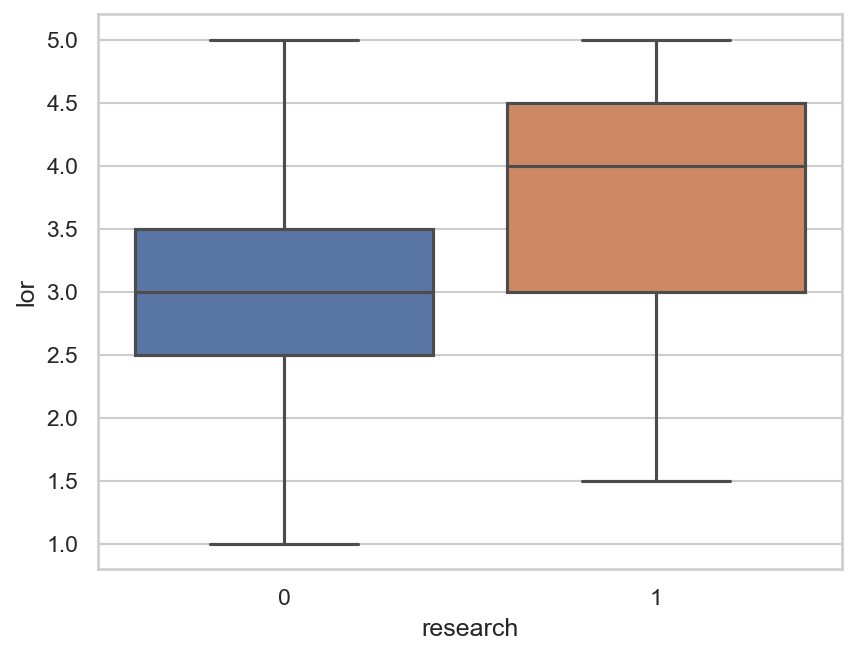

In [19]:
sns.boxplot(data, y='lor', x='research')

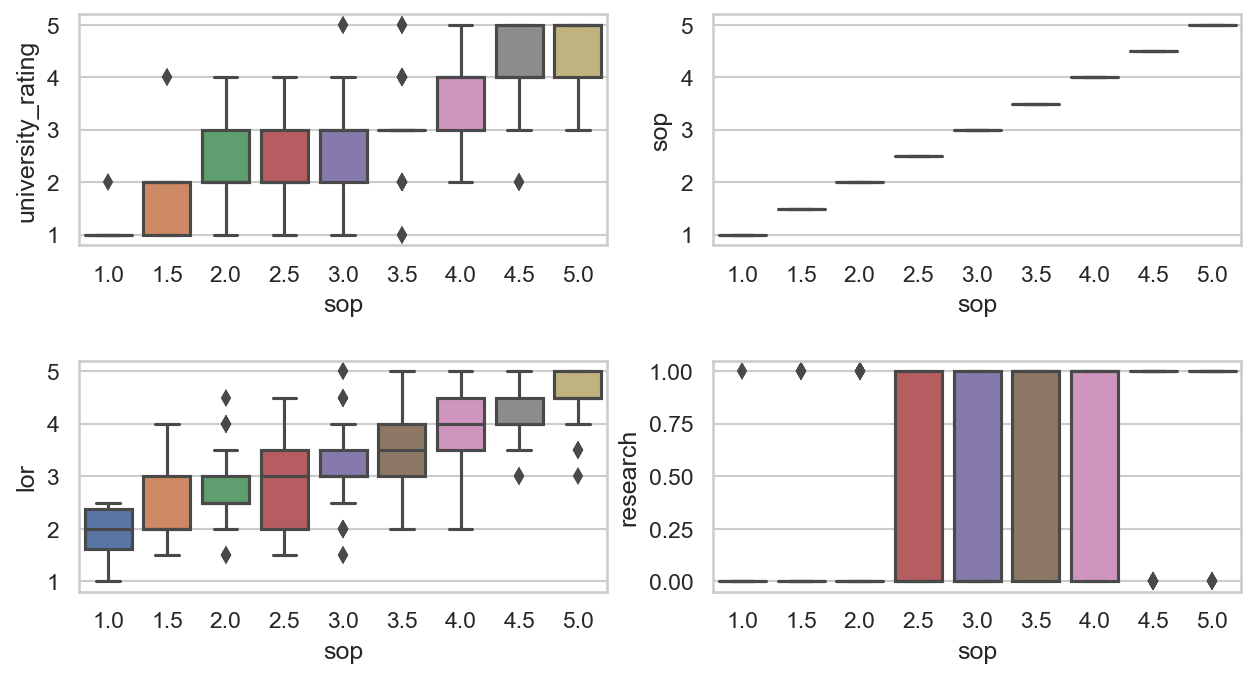

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
plt.subplots_adjust(hspace=0.5)

for col, ax in zip(category_cols, axs.ravel()):
    sns.boxplot(data, y=col, x='sop', ax=ax)
plt.show()

<Axes: xlabel='university_rating', ylabel='count'>

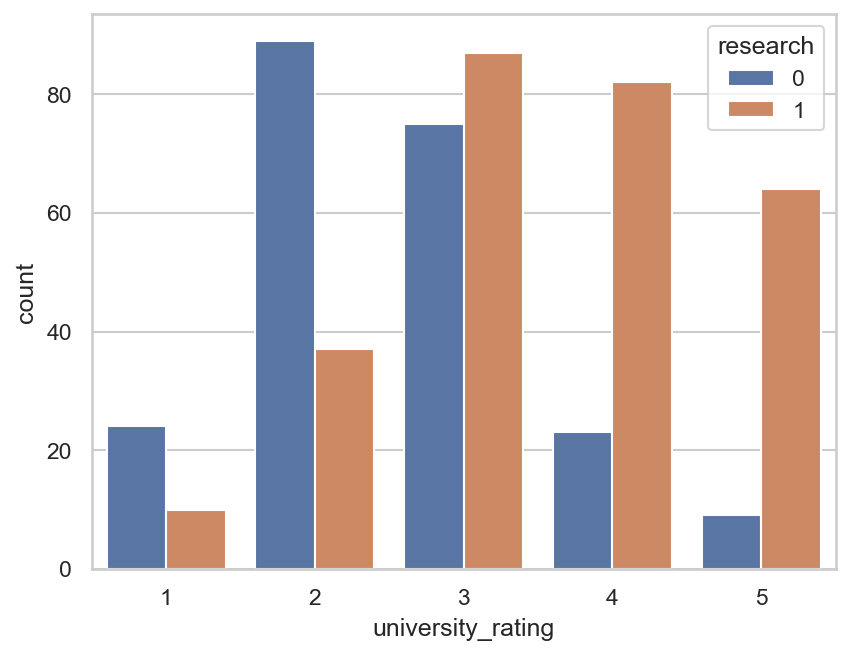

In [21]:
sns.countplot(data, x='university_rating', hue='research')

<Axes: xlabel='gre_score', ylabel='chance_of_admit'>

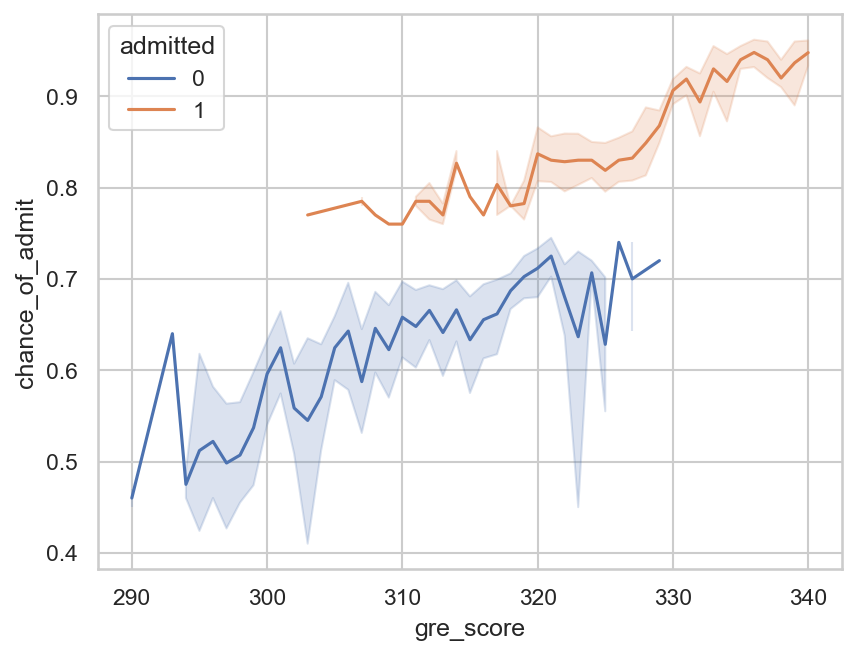

In [22]:
sns.lineplot(df, x='gre_score', y='chance_of_admit', hue='admitted')

<Axes: xlabel='toefl_score', ylabel='chance_of_admit'>

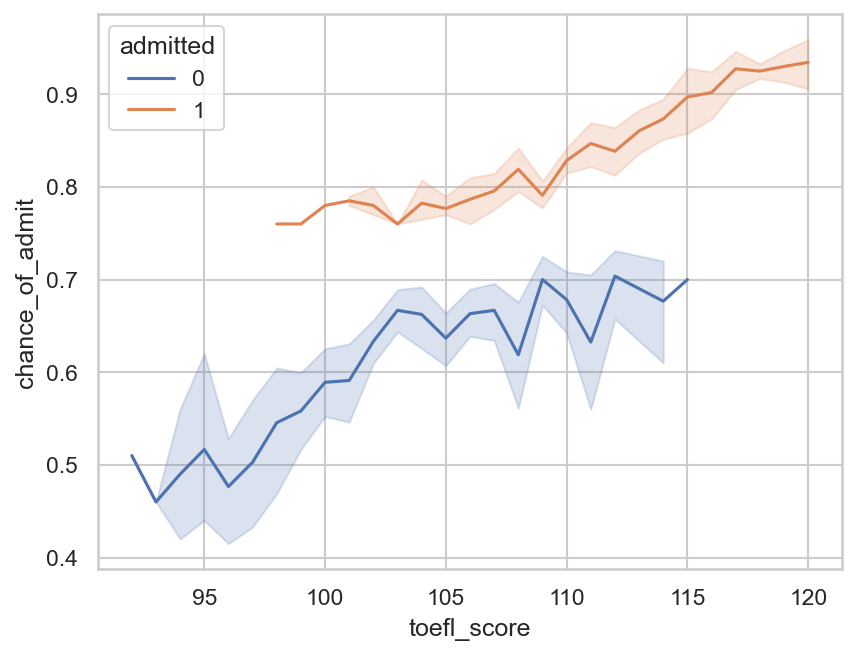

In [23]:
sns.lineplot(df, x='toefl_score', y='chance_of_admit', hue='admitted')

<Axes: xlabel='cgpa', ylabel='chance_of_admit'>

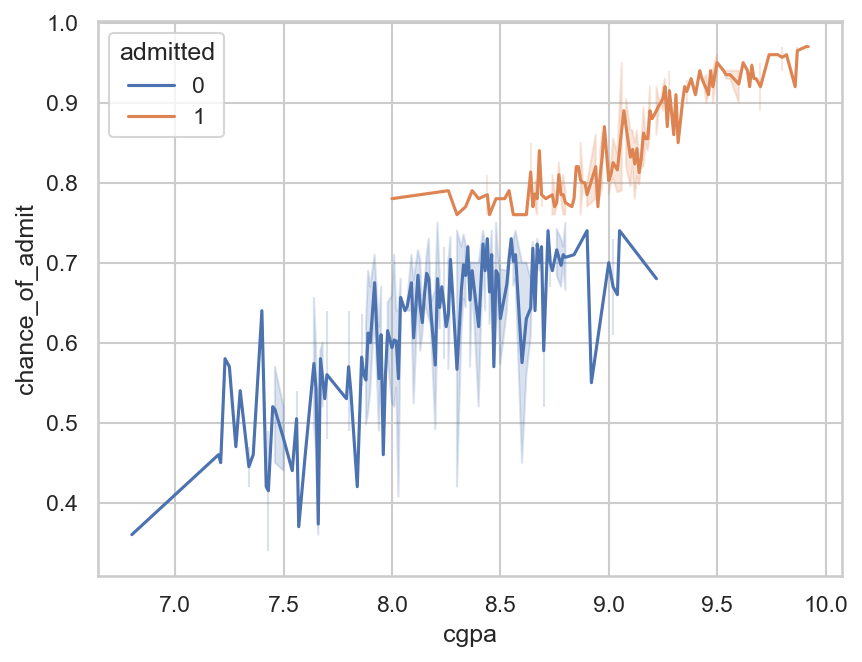

In [24]:
sns.lineplot(df, x='cgpa', y='chance_of_admit', hue='admitted')

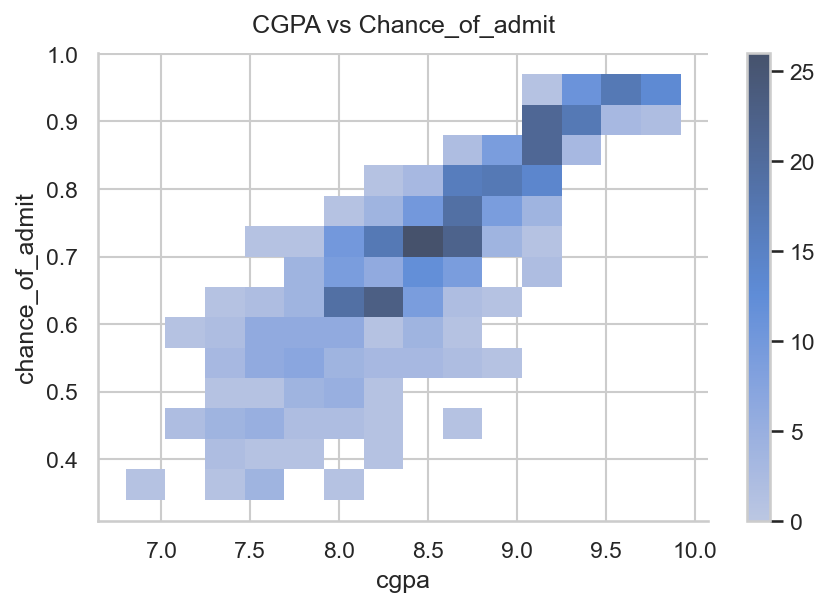

In [25]:
sns.displot(data, x="cgpa", y="chance_of_admit",  aspect=1.5, cbar=True, height=4)
plt.title("CGPA vs Chance_of_admit", pad=10)
plt.show()

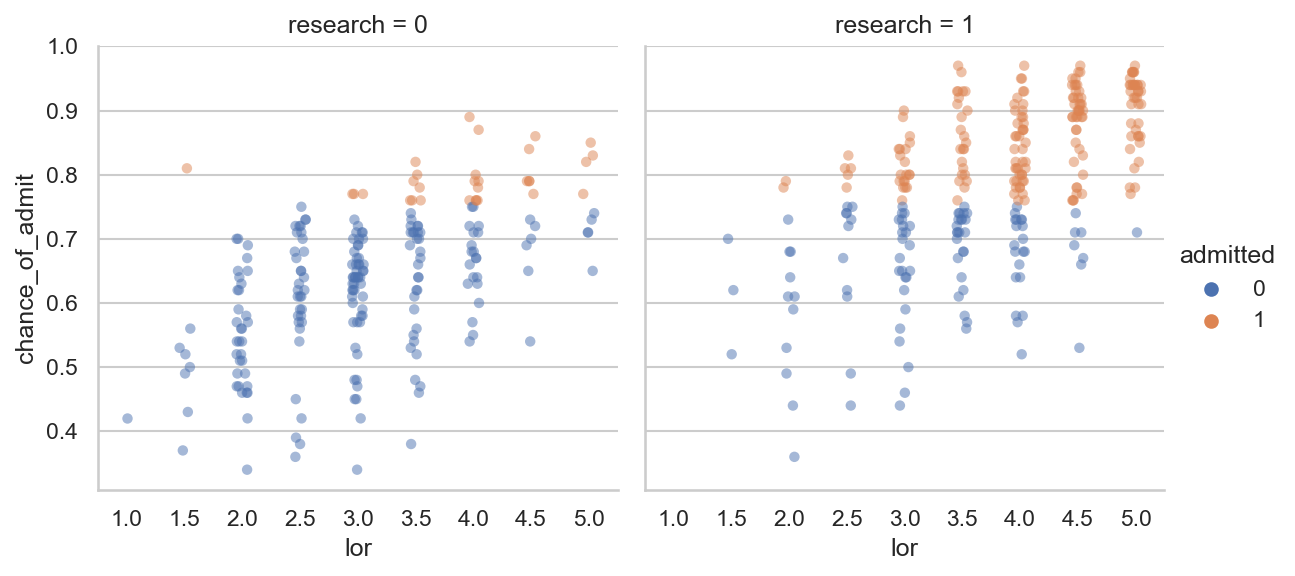

In [26]:
sns.catplot(df, y="chance_of_admit", x="lor", col="research", hue="admitted", height=4, alpha=0.5)

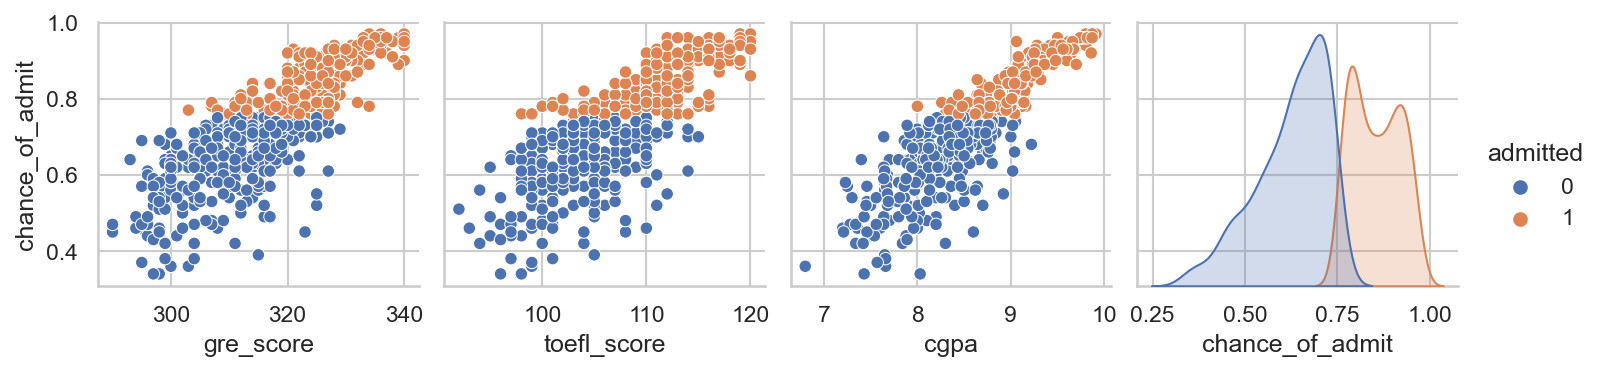

In [27]:
sns.pairplot(df, y_vars='chance_of_admit', hue='admitted' )

In [28]:
df

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,1
496,337,117,5,5.0,5.0,9.87,1,0.96,1
497,330,120,5,4.5,5.0,9.56,1,0.93,1
498,312,103,4,4.0,5.0,8.43,0,0.73,0


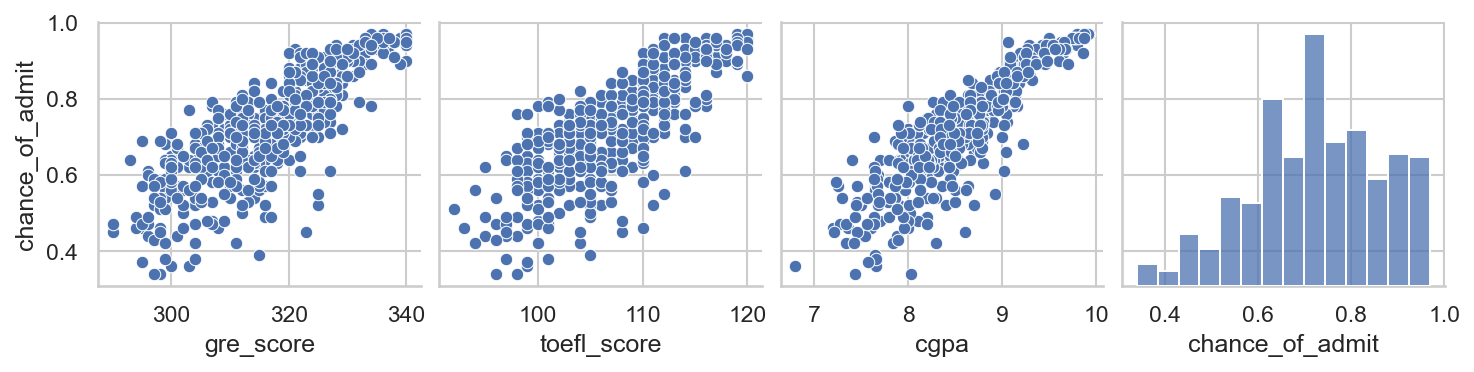

In [29]:
sns.pairplot(df, y_vars='chance_of_admit')

In [30]:
## Checking correlations

def correlation_chart(df, method='pearson'):

    # Use a sea green color palette
    cm = sns.light_palette("seagreen", as_cmap=True)
    return (
        df
        .corr(numeric_only=False, method=method)
        .style.format('{:.2}')\
            .background_gradient(cmap=cm,)\
            .set_caption(f'{method} correlation for numerical columns')
            )

display(correlation_chart(df))
print()
display(correlation_chart(df, 'spearman'))
print()
correlation_chart(df, 'kendall')

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
gre_score,1.0,0.83,0.64,0.61,0.52,0.83,0.56,0.81,0.71
toefl_score,0.83,1.0,0.65,0.64,0.54,0.81,0.47,0.79,0.68
university_rating,0.64,0.65,1.0,0.73,0.61,0.71,0.43,0.69,0.63
sop,0.61,0.64,0.73,1.0,0.66,0.71,0.41,0.68,0.61
lor,0.52,0.54,0.61,0.66,1.0,0.64,0.37,0.65,0.55
cgpa,0.83,0.81,0.71,0.71,0.64,1.0,0.5,0.88,0.76
research,0.56,0.47,0.43,0.41,0.37,0.5,1.0,0.55,0.5
chance_of_admit,0.81,0.79,0.69,0.68,0.65,0.88,0.55,1.0,0.8
admitted,0.71,0.68,0.63,0.61,0.55,0.76,0.5,0.8,1.0


,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
gre_score,1.0,0.82,0.64,0.62,0.51,0.83,0.58,0.82,0.73
toefl_score,0.82,1.0,0.65,0.64,0.52,0.81,0.47,0.79,0.69
university_rating,0.64,0.65,1.0,0.73,0.6,0.7,0.44,0.7,0.64
sop,0.62,0.64,0.73,1.0,0.66,0.72,0.41,0.7,0.63
lor,0.51,0.52,0.6,0.66,1.0,0.64,0.38,0.64,0.56
cgpa,0.83,0.81,0.7,0.72,0.64,1.0,0.51,0.89,0.79
research,0.58,0.47,0.44,0.41,0.38,0.51,1.0,0.57,0.5
chance_of_admit,0.82,0.79,0.7,0.7,0.64,0.89,0.57,1.0,0.86
admitted,0.73,0.69,0.64,0.63,0.56,0.79,0.5,0.86,1.0


,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
gre_score,1.0,0.66,0.51,0.48,0.39,0.65,0.48,0.65,0.6
toefl_score,0.66,1.0,0.52,0.5,0.4,0.64,0.4,0.62,0.58
university_rating,0.51,0.52,1.0,0.62,0.5,0.57,0.39,0.57,0.58
sop,0.48,0.5,0.62,1.0,0.54,0.56,0.36,0.55,0.55
lor,0.39,0.4,0.5,0.54,1.0,0.49,0.33,0.49,0.49
cgpa,0.65,0.64,0.57,0.56,0.49,1.0,0.42,0.73,0.64
research,0.48,0.4,0.39,0.36,0.33,0.42,1.0,0.47,0.5
chance_of_admit,0.65,0.62,0.57,0.55,0.49,0.73,0.47,1.0,0.71
admitted,0.6,0.58,0.58,0.55,0.49,0.64,0.5,0.71,1.0


In [31]:
# Checking severity of non-normality - feature wise

normality_df = pd.DataFrame(columns=['Skewness', 'Kurtosis'])
for col in df.select_dtypes(exclude=['object', 'category']).columns[:-1]:
    normality_df.loc[f'{col}'] = [df[col].skew().round(2), df[col].kurt().round(2)]

display(normality_df)

,Skewness,Kurtosis
gre_score,-0.04,-0.71
toefl_score,0.10,-0.65
cgpa,-0.03,-0.56


In [32]:
# Assessing Normality using Shapiro Wilk test

for col in df.select_dtypes(exclude='category').columns:
    print(f'{col:20} : {stats.shapiro(df[col])}')

gre_score            : ShapiroResult(statistic=0.9857442378997803, pvalue=8.212661487050354e-05)
toefl_score          : ShapiroResult(statistic=0.9858347177505493, pvalue=8.730924309929833e-05)
cgpa                 : ShapiroResult(statistic=0.9922108054161072, pvalue=0.010292120277881622)
chance_of_admit      : ShapiroResult(statistic=0.9802490472793579, pvalue=2.654237050592201e-06)


In [33]:
# Assessing Normality using Shapiro Wilk test

for col in df.select_dtypes(exclude='category').columns:
    print(f'{col:20} : {stats.shapiro(df[col]**3)}')

gre_score            : ShapiroResult(statistic=0.9852748513221741, pvalue=5.9948743000859395e-05)
toefl_score          : ShapiroResult(statistic=0.9780205488204956, pvalue=7.576693406008417e-07)
cgpa                 : ShapiroResult(statistic=0.9859814643859863, pvalue=9.645398677093908e-05)
chance_of_admit      : ShapiroResult(statistic=0.9579553604125977, pvalue=9.551247986960831e-11)


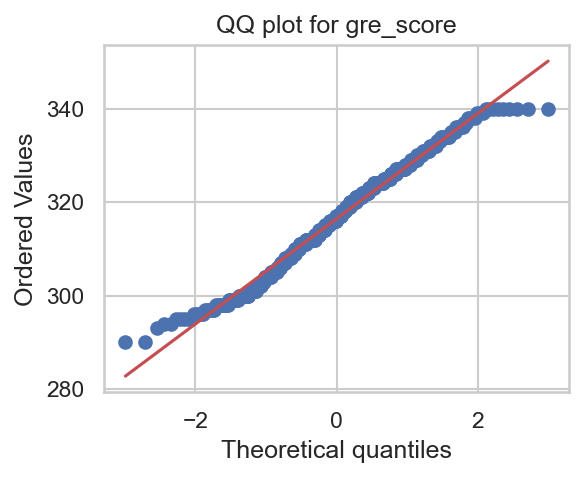

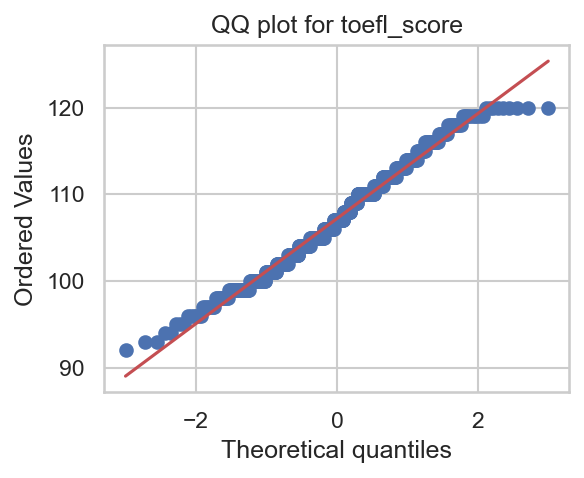

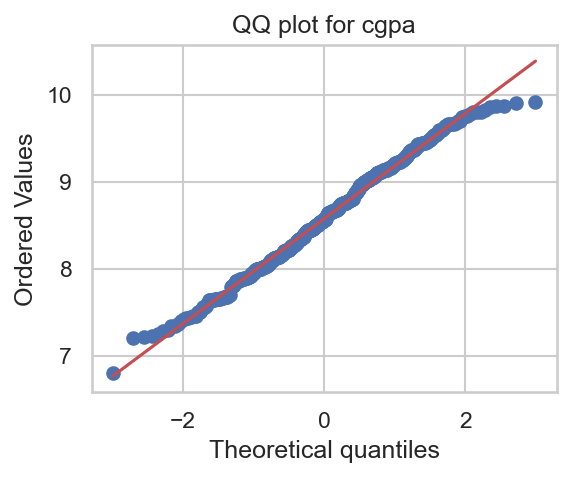

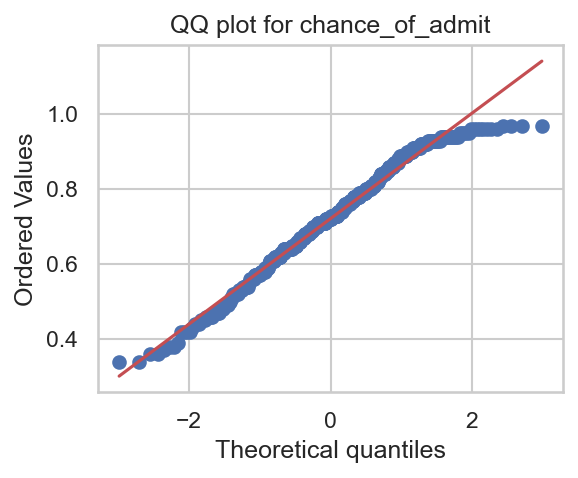

In [34]:
# Let's check the QQ plot

for col in df.select_dtypes(exclude='category').columns:
    plt.figure(figsize=(4,3))
    stats.probplot(df[col], plot=plt)
    plt.title(f'QQ plot for {col}')
    plt.show()

In [35]:
df

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,1
496,337,117,5,5.0,5.0,9.87,1,0.96,1
497,330,120,5,4.5,5.0,9.56,1,0.93,1
498,312,103,4,4.0,5.0,8.43,0,0.73,0


In [36]:
df = df.drop("admitted", axis=1)

In [37]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm
# Lets scale the data, standardization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.loc[:,df.columns.drop('chance_of_admit')]
Y = df["chance_of_admit"]

sc = StandardScaler()
cols = X.columns
X[cols] = sc.fit_transform(X[cols])

X_sm = sm.add_constant(X)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(Y, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        chance_of_admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          8.21e-180
Time:                        21:45:29   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7217      0.00

In [38]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,cgpa,4.78
0,gre_score,4.46
1,toefl_score,3.90
3,sop,2.84
2,university_rating,2.62
4,lor,2.03
6,research,1.49


In [39]:
X2 = X.loc[:,X.columns.drop('cgpa')]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(Y, X2_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        chance_of_admit   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     272.1
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          6.84e-153
Time:                        21:45:29   Log-Likelihood:                 635.33
No. Observations:                 500   AIC:                            -1257.
Df Residuals:                     493   BIC:                            -1227.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7217      0.00

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

pipeline = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('lr', LinearRegression())
])

In [41]:
pipeline.fit(X2, Y)

Pipeline(steps=[('scale', MinMaxScaler()), ('lr', LinearRegression())])

In [42]:
y_pred = pipeline.predict(X2)

r2_score(Y, y_pred)

0.7680381072831426

In [43]:
pipeline.fit(X, Y)

Pipeline(steps=[('scale', MinMaxScaler()), ('lr', LinearRegression())])

In [44]:
y_pred = pipeline.predict(X)

r2_score(Y, y_pred)

0.8219007395178417

In [45]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [46]:
pipeline = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('rr', RidgeCV())
])

In [47]:
pipeline.fit(X2, Y, )

Pipeline(steps=[('scale', StandardScaler()), ('rr', RidgeCV())])

In [48]:
y_pred = pipeline.predict(X2)

r2_score(Y, y_pred)

0.7679746617384571

In [49]:
from sklearn.metrics.pairwise import rbf_kernel

toefl_score_110 = rbf_kernel(data[["chance_of_admit"]], [[110]], gamma=0.01)

<Axes: ylabel='Count'>

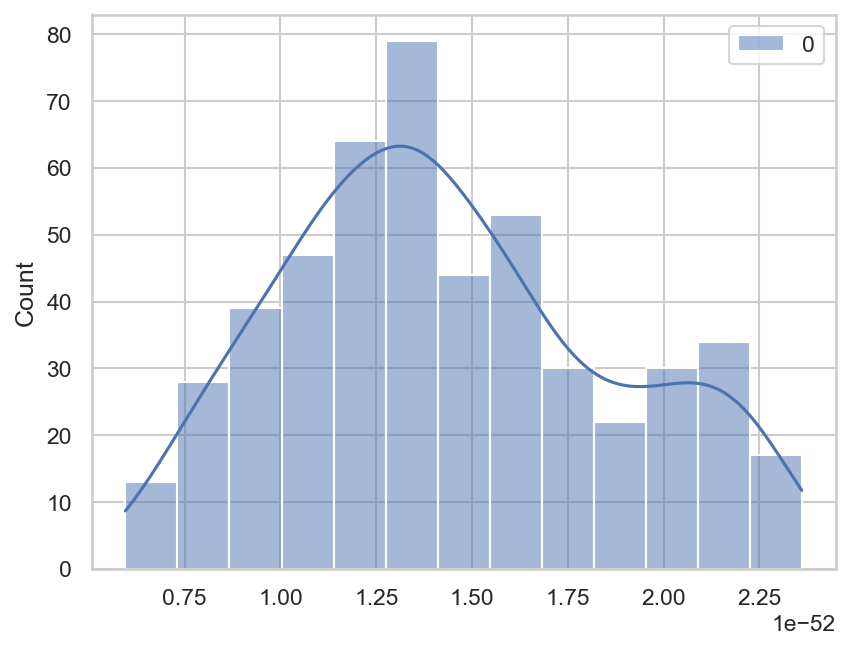

In [50]:
sns.histplot(toefl_score_110, kde=True)


In [51]:
pipeline = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('rr', LassoCV())
])

In [52]:
pipeline.fit(X2, Y, )

Pipeline(steps=[('scale', StandardScaler()), ('rr', LassoCV())])

In [53]:
y_pred = pipeline.predict(X2)

r2_score(Y, y_pred)

0.7680282135083527

In [54]:
pipeline = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('rr', ElasticNetCV())
])

pipeline.fit(X2, Y, )
y_pred = pipeline.predict(X2)

r2_score(Y, y_pred)

0.7680173787217309

In [55]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
preprocessor = Pipeline(steps=[
    ('scale', StandardScaler()),
])

In [57]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


r2scores=[]
adjustedr2 = []
feature_names=[]
for i in range(1, 8):   
    reduce_dim_pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('reduce_dim', SelectKBest(k=i, score_func=f_regression)),       
    ])
    
    pipeline = Pipeline(steps=[
        ('reduce_dim_pipe', reduce_dim_pipe),       
        ('regress', LinearRegression())
    ])
    
    # calculate cross validated R2
    R2 = cross_val_score(pipeline, X=X_train, y=y_train,cv=10, scoring='r2').mean()    
    r2scores.append(R2)
        
    # calculate Adj R2
    n= len(X_train)
    p = i #len(X.columns)
    adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
    # print(R2, adj_R2)
    adjustedr2.append(adj_R2)
    
    reduce_dim_pipe.fit(X=X_train, y=y_train)
    # Get columns to keep    
    cols = reduce_dim_pipe.named_steps['reduce_dim'].get_support(indices=True) # Get a mask, or integer index, of the features selected.
    # Create new dataframe with only desired columns
    # print(cols)
    features_df_new = X_train.iloc[:, cols]
    best_features = list(features_df_new.columns)
    # print(best_features)
    feature_names.append(best_features)

In [58]:
scoring_df = pd.DataFrame(np.column_stack((r2scores, adjustedr2)), columns=['R2', 'Adj_R2'])
scoring_df['feature_names'] = feature_names
scoring_df['features'] = range(1, 8)
scoring_df

,R2,Adj_R2,feature_names,features
0,0.749339,0.748551,[cgpa],1
1,0.774905,0.773485,"[gre_score, cgpa]",2
2,0.780731,0.778649,"[gre_score, toefl_score, cgpa]",3
3,0.777659,0.774836,"[gre_score, toefl_score, sop, cgpa]",4
4,0.780933,0.777445,"[gre_score, toefl_score, university_rating, so...",5
5,0.787664,0.783594,"[gre_score, toefl_score, university_rating, so...",6
6,0.796212,0.791640,"[gre_score, toefl_score, university_rating, so...",7


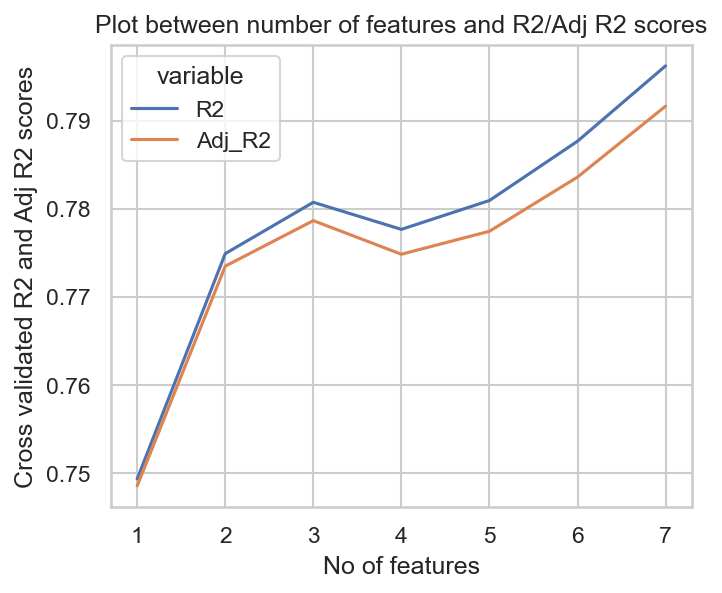

In [59]:
fig, ax = plt.subplots(figsize=(5, 4))
# convert data frame from wide format to long format 
# so that we can pass into seaborn line plot function to draw multiple line plots in same figure
# https://stackoverflow.com/questions/52308749/how-do-i-create-a-multiline-plot-using-seaborn

long_format_df = pd.melt(scoring_df.loc[:, ['features','R2', 'Adj_R2']], ['features'])
sns.lineplot(x='features', y='value', hue='variable', data=long_format_df, ax=ax)
ax.set_xlabel('No of features')
ax.set_ylabel('Cross validated R2 and Adj R2 scores')
ax.set_title('Plot between number of features and R2/Adj R2 scores')
plt.show()

Text(0, 0.5, 'R2 Score')

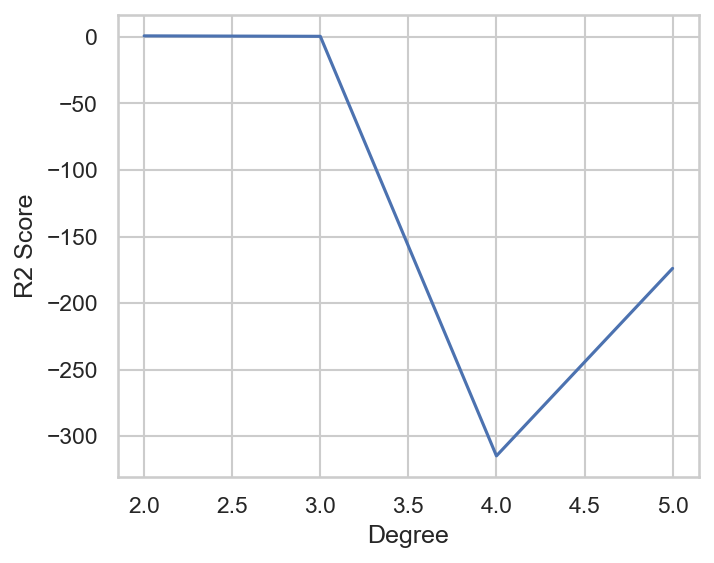

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

r2scores = []
for degree in range(2,6):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(poly_features, std_scaler, lin_reg)
    polynomial_regression.fit(X_train, y_train)
    r2scores.append(r2_score(y_val, polynomial_regression.predict(X_val)))

plt.figure(figsize=(5,4))
plt.plot(range(2,6), r2scores)
plt.xlabel('Degree')
plt.ylabel('R2 Score')

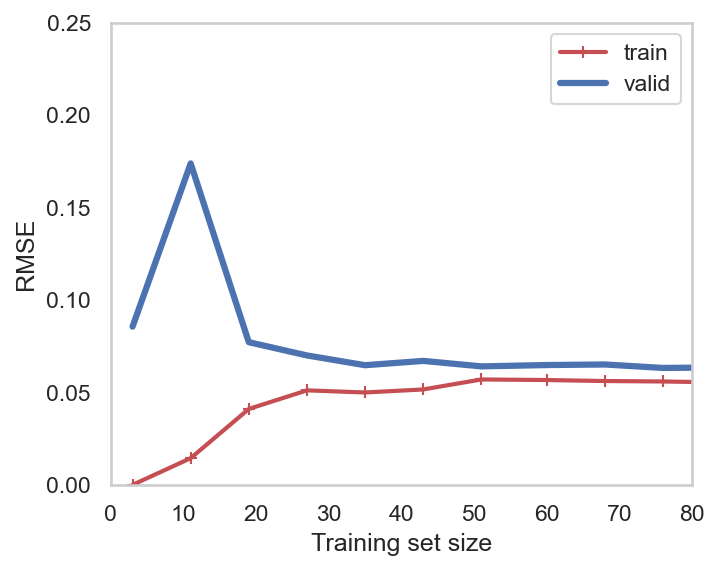

In [61]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(5, 4))  
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, .25])


plt.show()

In [62]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

In [63]:
r2_score(y_val, ridge_reg.predict(X_val))

0.8236935924784257

In [64]:
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([
    ("preprocessing", StandardScaler()),
    ("ridge", Ridge()),
])

param_grid = [
    {'ridge__alpha': [0.1, 0.01, 0.001, 0.0001],
     'ridge__solver': ['cholesky', 'lsqr']
     },
]
grid_search = GridSearchCV(pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid=[{'ridge__alpha': [0.1, 0.01, 0.001, 0.0001],
                          'ridge__solver': ['cholesky', 'lsqr']}],
             scoring='neg_root_mean_squared_error')

In [65]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('ridge', Ridge(alpha=0.1, solver='lsqr'))])

In [66]:
r2_score(y_val, grid_search.predict(X_val))

0.8236944650084074

In [67]:
from sklearn.linear_model import Lasso

pipeline = Pipeline([
    ("preprocessing", StandardScaler()),
    ("lasso", Lasso()),
])

param_grid = [
    {'lasso__alpha': [0.1, 0.01, 0.001, 0.0001],
     
     },
]
grid_search = GridSearchCV(pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid=[{'lasso__alpha': [0.1, 0.01, 0.001, 0.0001]}],
             scoring='neg_root_mean_squared_error')

In [68]:
r2_score(y_val, grid_search.predict(X_val))

0.8241354476913991

In [69]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('lasso', Lasso(alpha=0.0001))])

In [70]:
best_lasso = grid_search.best_estimator_.named_steps['lasso']
best_lasso.fit(X, y)


Lasso(alpha=0.0001)

In [71]:
coef_df = pd.DataFrame({'features' : X.columns, 'coefficients' : best_lasso.coef_})


In [72]:
coef_df.sort_values('coefficients', ascending=False)

,features,coefficients
5,cgpa,0.068016
0,gre_score,0.027445
1,toefl_score,0.018176
4,lor,0.015887
6,research,0.011873
2,university_rating,0.002916
3,sop,0.001775


In [73]:
r2_score(y_test, best_lasso.predict(X_test))

0.8189007453992284

In [74]:
best_four_features = ["gre_score", "toefl_score", "sop", "cgpa"]
	

In [75]:
pipeline = Pipeline([
    ("preprocessing", StandardScaler()),
    ("lasso", Lasso()),
])

param_grid = [
    {'lasso__alpha': [0.1, 0.01, 0.001, 0.0001],
     
     },
]
grid_search = GridSearchCV(pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X[best_four_features], y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid=[{'lasso__alpha': [0.1, 0.01, 0.001, 0.0001]}],
             scoring='neg_root_mean_squared_error')

In [76]:
r2_score(y_test, grid_search.predict(X_test[best_four_features]))

0.8009091128128203

In [77]:
best_lasso = grid_search.best_estimator_.named_steps['lasso']
best_lasso.fit(X[best_four_features], y)

Lasso(alpha=0.0001)

In [78]:
r2_score(y_test, best_lasso.predict(X_test[best_four_features]))

0.8009174977125895

In [79]:
pipeline = Pipeline([
    ("preprocessing", StandardScaler()),
    ("ridge", Ridge()),
])

param_grid = [
    {'ridge__alpha': [0.1, 0.01, 0.001, 0.0001],
     
     },
]
grid_search = GridSearchCV(pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X[best_four_features], y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid=[{'ridge__alpha': [0.1, 0.01, 0.001, 0.0001]}],
             scoring='neg_root_mean_squared_error')

In [80]:
r2_score(y_test, grid_search.predict(X_test[best_four_features]))

0.8008377616640966

In [81]:
best_ridge = grid_search.best_estimator_.named_steps['ridge']
best_ridge.fit(X[best_four_features], y)

Ridge(alpha=0.1)

In [82]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [83]:
r2_score(y_test, lr.predict(X_test))

0.8188432567829629

In [84]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42, verbose=2)
sgd.fit(X, y)

-- Epoch 1
Norm: 0.06, NNZs: 7, Bias: 0.505358, T: 400, Avg. loss: 0.086802
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 7, Bias: 0.626332, T: 800, Avg. loss: 0.013483
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 7, Bias: 0.675289, T: 1200, Avg. loss: 0.004380
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 7, Bias: 0.698445, T: 1600, Avg. loss: 0.002504
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 7, Bias: 0.709361, T: 2000, Avg. loss: 0.002036
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 7, Bias: 0.714901, T: 2400, Avg. loss: 0.001900
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.07, NNZs: 7, Bias: 0.718573, T: 2800, Avg. loss: 0.001844
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.07, NNZs: 7, Bias: 0.720295, T: 3200, Avg. loss: 0.001829
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.07, NNZs: 7, Bias: 0.721450, T: 3600, Avg. loss: 0.001816
Total training time: 0.00 sec

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05,
             verbose=2)

In [85]:
r2_score(y_test, sgd.predict(X_test))

0.8189371206449212

<Axes: xlabel='chance_of_admit', ylabel='Count'>

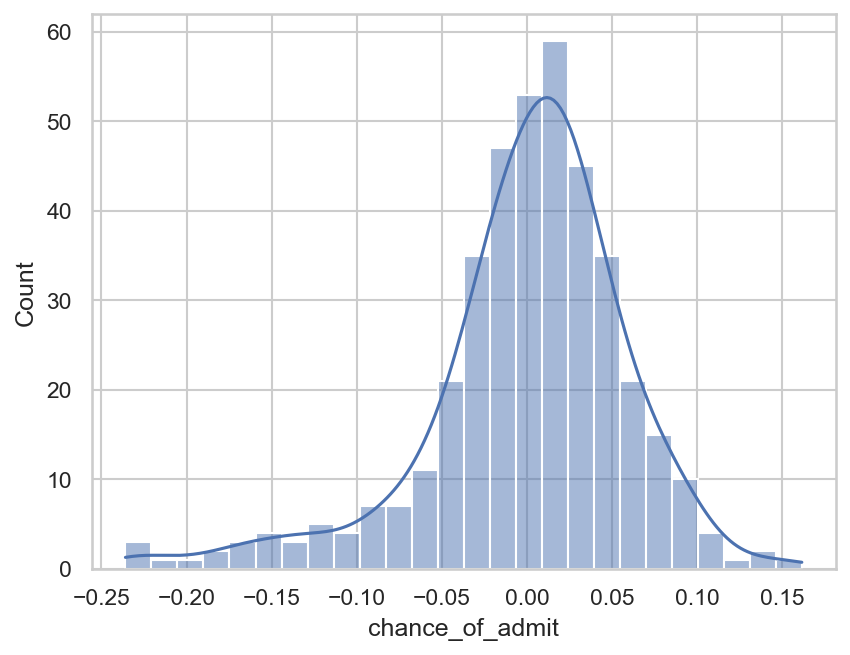

In [86]:
y_pred = sgd.predict(X)

error = y - y_pred
sns.histplot(x=error, kde=True)

Text(0, 0.5, 'error')

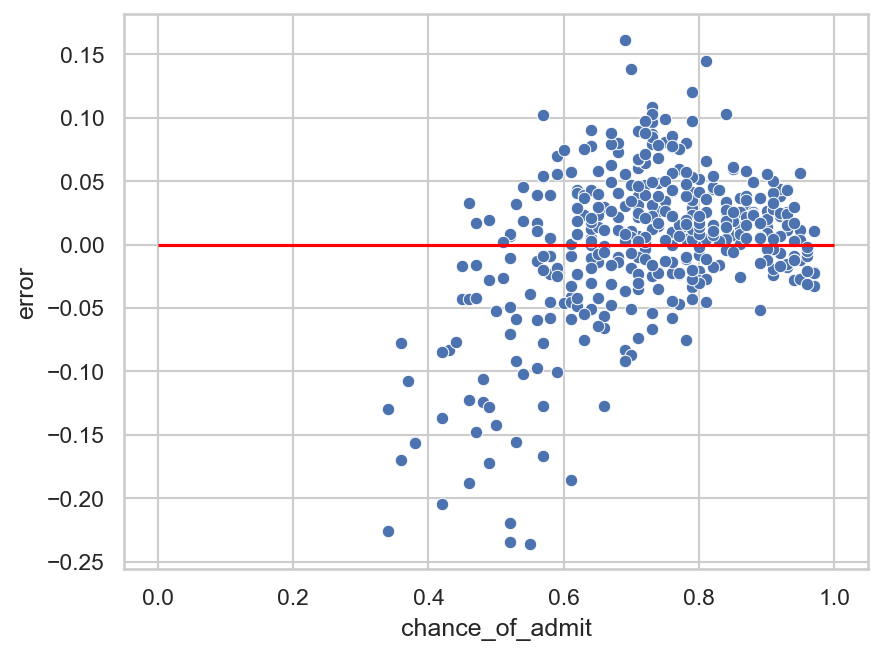

In [88]:
sns.scatterplot(x=y, y=error)
plt.hlines(y=0, xmin=0, xmax=1, colors='red')
plt.ylabel('error')

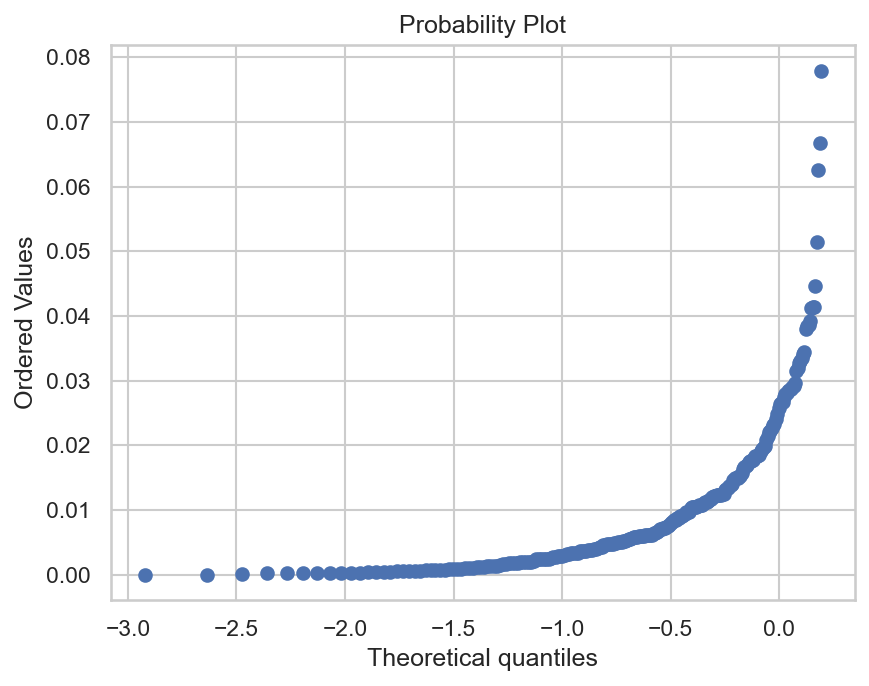

In [102]:
stats.probplot(x=error, plot=plt)
plt.show()

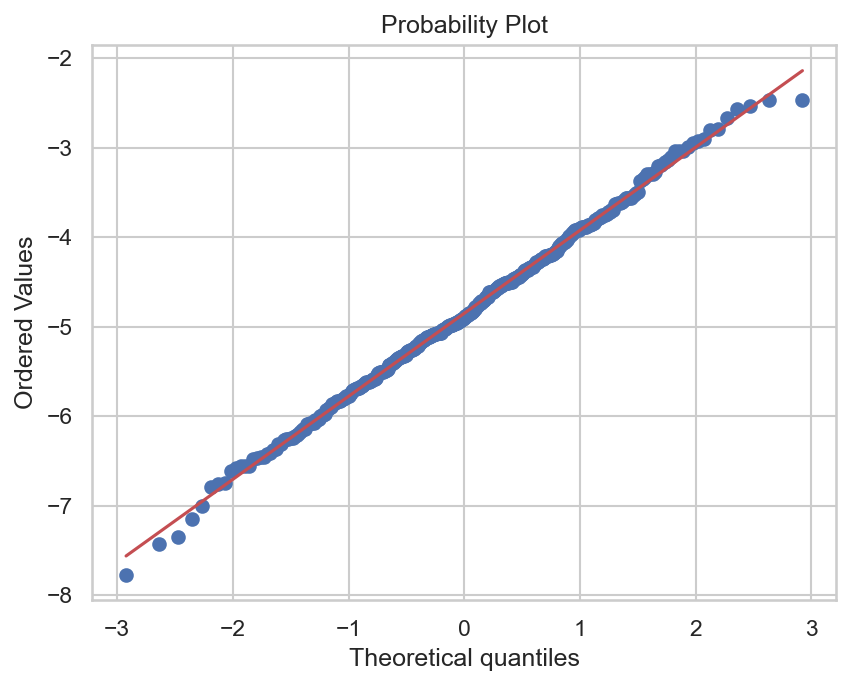

In [111]:
boxcox_error = stats.boxcox(error**2)[0]

stats.probplot(x=boxcox_error, plot=plt)
plt.show()

<Axes: xlabel='chance_of_admit', ylabel='Count'>

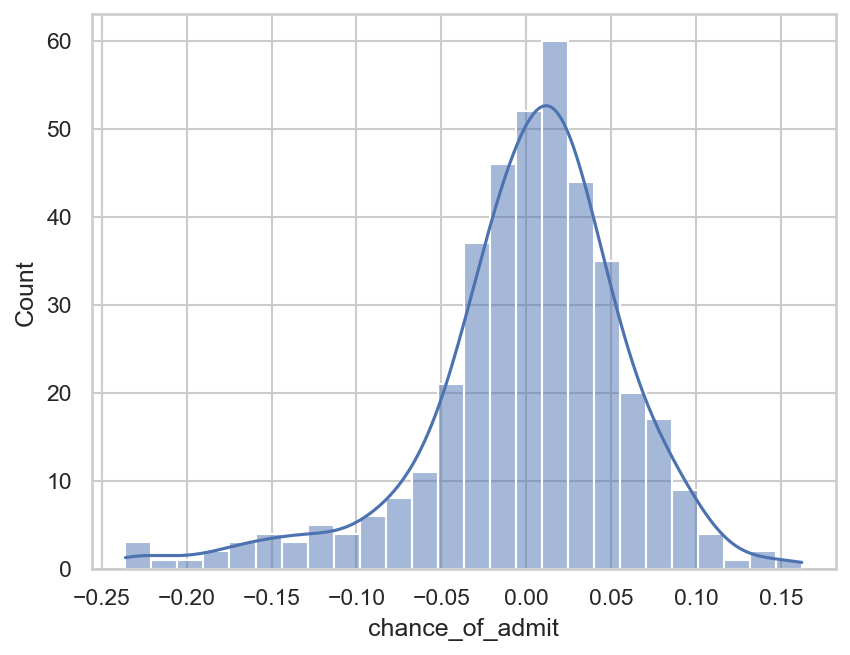

In [91]:
y_pred = lr.predict(X)

error = y - y_pred
sns.histplot(x=error, kde=True)

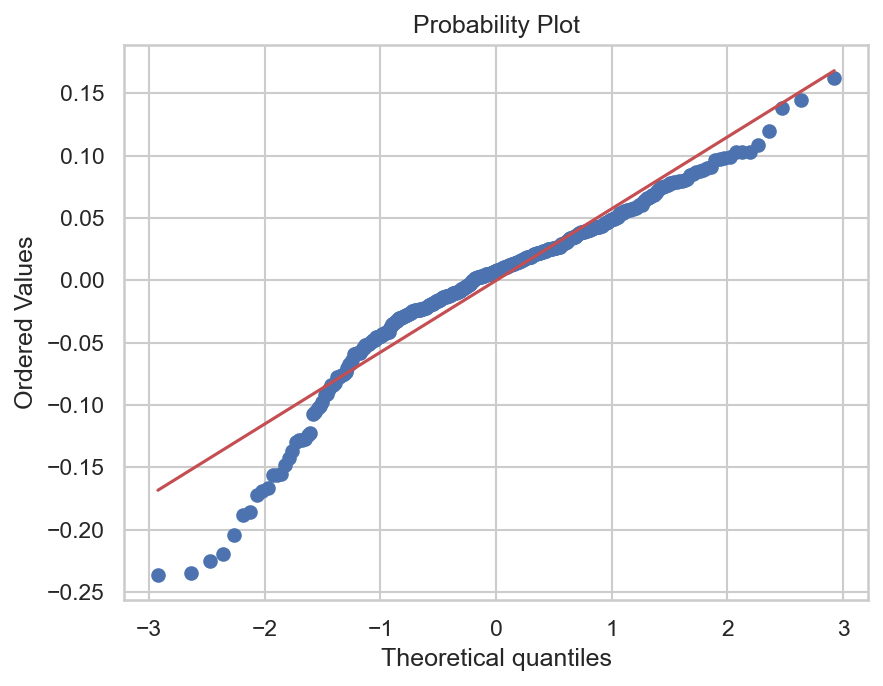

In [92]:
stats.probplot(x=error, plot=plt)
plt.show()

Heteroskedasticity shouldn't exist 

<Axes: xlabel='chance_of_admit', ylabel='chance_of_admit'>

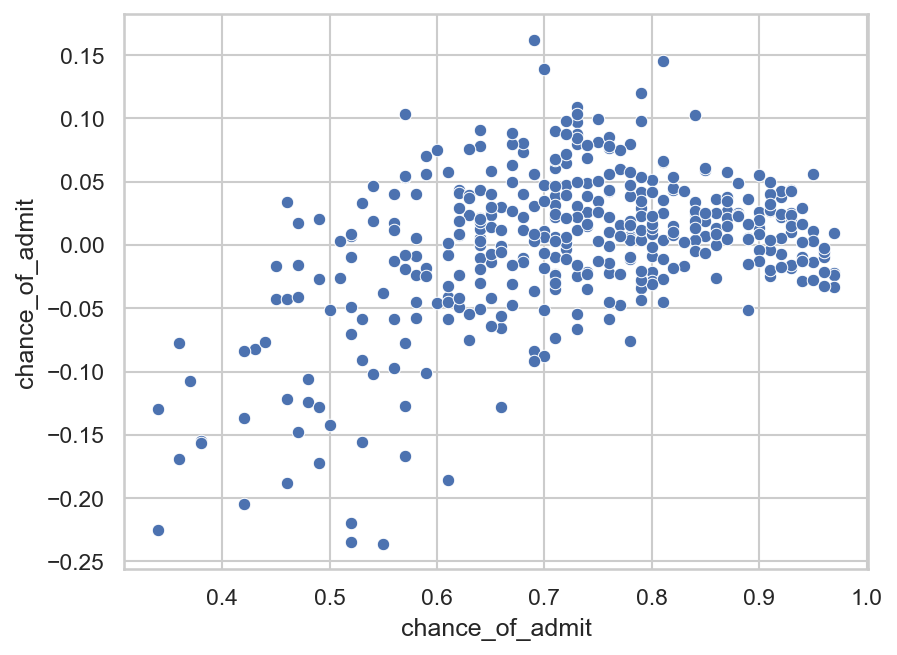

In [93]:
sns.scatterplot(x=y, y=error)